In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
"""Load dataset into jupyter notebook"""
data = pd.read_excel('Strikers_performance.xlsx')
data.head()

,Striker_ID,Nationality,Footedness,Marital Status,Goals Scored,Assists,Shots on Target,Shot Accuracy,Conversion Rate,Dribbling Success,Movement off the Ball,Hold-up Play,Aerial Duels Won,Defensive Contribution,Big Game Performance,Consistency,Penalty Success Rate,Impact on Team Performance,Off-field Conduct
0,1,Spain,Left-footed,No,17.483571,10.778533,34.795488,0.677836,0.166241,0.757061,50.921924,71.806409,15.682532,30.412215,6.152481,0.820314,0.922727,8.570370,11.451388
1,2,France,Left-footed,Yes,14.308678,13.728250,31.472436,0.544881,0.192774,0.796818,61.396150,53.726866,19.843983,26.474913,6.093172,0.803321,0.678984,3.444638,8.243689
2,3,Germany,Left-footed,No,18.238443,3.804297,25.417413,0.518180,0.160379,0.666869,65.863945,60.452227,20.090084,24.164116,3.408714,0.766540,0.843858,8.429491,9.506835
3,4,France,Right-footed,No,22.615149,9.688908,20.471443,0.599663,0.184602,0.638776,88.876877,60.511979,22.363152,44.129989,6.339820,0.611798,0.662997,6.532552,8.199653
4,5,France,Left-footed,Yes,13.829233,6.048072,29.887563,0.582982,0.105319,0.591485,75.565531,54.982158,13.165708,37.859323,8.465658,0.701638,0.906538,8.414915,6.665333


In [4]:
!pip install openpyxl    

In [5]:
from openpyxl import load_workbook

In [29]:
"""Checks for missing values"""
missing_data = data.isnull().sum()
print("Missing Data:"

Missing Data:


Striker_ID                    0
Nationality                   0
Footedness                    0
Marital Status                0
Goals Scored                  0
Assists                       0
Shots on Target               0
Shot Accuracy                 0
Conversion Rate               0
Dribbling Success             0
Movement off the Ball         0
Hold-up Play                  0
Aerial Duels Won              0
Defensive Contribution        0
Big Game Performance          0
Consistency                   0
Penalty Success Rate          0
Impact on Team Performance    0
Off-field Conduct             0
dtype: int64

In [7]:
!pip install scikit-learn

In [24]:
import sklearn

In [25]:
from sklearn.impute import SimpleImputer

In [26]:
"""Replace missing values with median"""
imputer = SimpleImputer(strategy = 'median')
imputer.fit(data[['Movement off the Ball']])
data[['Movement off the Ball']] = imputer.transform(data[['Movement off the Ball']])
            

In [27]:
imputer_2 = SimpleImputer(strategy = 'median')
imputer_2.fit(data[['Big Game Performance']])
data[['Big Game Performance']] = imputer_2.transform(data[['Big Game Performance']])

In [28]:
imputer_3 = SimpleImputer(strategy = 'median')
imputer_3.fit(data[['Penalty Success Rate']])
data[['Penalty Success Rate']] = imputer_3.transform(data[['Penalty Success Rate']])

In [30]:
"""Checks for duplicates"""
duplicates = data.duplicated()
data[duplicates]

,Striker_ID,Nationality,Footedness,Marital Status,Goals Scored,Assists,Shots on Target,Shot Accuracy,Conversion Rate,Dribbling Success,Movement off the Ball,Hold-up Play,Aerial Duels Won,Defensive Contribution,Big Game Performance,Consistency,Penalty Success Rate,Impact on Team Performance,Off-field Conduct


In [42]:
data.dtypes

Striker_ID                      int64
Nationality                    object
Footedness                     object
Marital Status                 object
Goals Scored                    int64
Assists                         int64
Shots on Target                 int64
Shot Accuracy                 float64
Conversion Rate               float64
Dribbling Success             float64
Movement off the Ball           int64
Hold-up Play                    int64
Aerial Duels Won                int64
Defensive Contribution          int64
Big Game Performance            int64
Consistency                   float64
Penalty Success Rate          float64
Impact on Team Performance      int64
Off-field Conduct               int64
dtype: object

In [43]:
"""Converts datatypes from float to int"""
data['Goals Scored'] = data['Goals Scored'].astype('int64')

In [44]:
data['Assists'] = data['Assists'].astype('int64')

In [34]:
data['Shots on Target'] = data['Shots on Target'].astype('int64')

In [35]:
data['Movement off the Ball'] = data['Movement off the Ball'].astype('int64')

In [36]:
data['Hold-up Play'] = data['Hold-up Play'].astype('int64')

In [37]:
data['Aerial Duels Won'] = data['Aerial Duels Won'].astype('int64')

In [38]:
data['Defensive Contribution'] = data['Defensive Contribution'].astype('int64')

In [39]:
data['Big Game Performance'] = data['Big Game Performance'].astype('int64')

In [40]:
data['Impact on Team Performance'] = data['Impact on Team Performance'].astype('int64')

In [41]:
data['Off-field Conduct'] = data['Off-field Conduct'].astype('int64')

In [45]:
"""Statistics summary"""
desc_stats = round(data.describe(), 2)
print(desc_stats)

       Striker_ID  Goals Scored  Assists  Shots on Target  Shot Accuracy  \
count      500.00        500.00   500.00           500.00         500.00   
mean       250.50         14.52     7.60            25.26           0.60   
std        144.48          4.91     2.96             7.08           0.10   
min          1.00          0.00     0.00             4.00           0.31   
25%        125.75         11.00     6.00            20.00           0.54   
50%        250.50         15.00     8.00            25.00           0.60   
75%        375.25         18.00     9.00            30.00           0.67   
max        500.00         34.00    15.00            43.00           0.92   

       Conversion Rate  Dribbling Success  Movement off the Ball  \
count           500.00             500.00                 500.00   
mean              0.20               0.70                  69.28   
std               0.05               0.10                  10.33   
min               0.05               0.40  

In [49]:
freq_footedness = data['Footedness'].value_counts()
freq_footedness

Footedness
Right-footed    267
Left-footed     233
Name: count, dtype: int64

In [50]:
"""Calculates percentage for pie chart"""
perc_footedness = freq_footedness/len(data['Footedness']) * 100
perc_footedness

Footedness
Right-footed    53.4
Left-footed     46.6
Name: count, dtype: float64

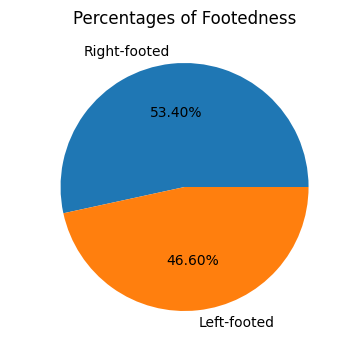

In [51]:
"""Plots the pie chart"""
plt.figure(figsize = (4,7))
perc_footedness.plot(kind = 'pie', autopct = '%1.2f%%')
plt.title('Percentages of Footedness')
plt.ylabel(' ')
plt.show()

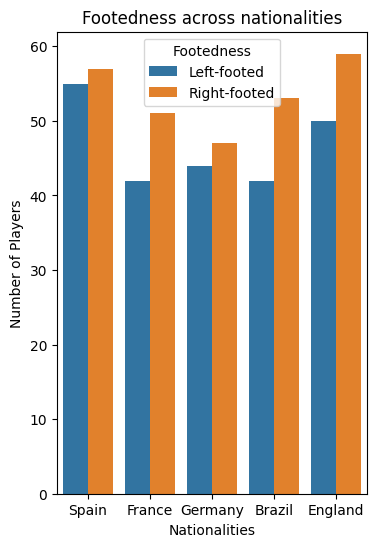

In [53]:
plt.figure(figsize = (4, 6))
sns.countplot(x = 'Nationality', hue = 'Footedness', data = data)
plt.title('Footedness across nationalities')
plt.xlabel('Nationalities')
plt.ylabel('Number of Players')
plt.show()

In [54]:
avg_goal_scored = round(data.groupby('Nationality')['Goals Scored'].mean(),2)
avg_goal_scored

Nationality
Brazil     15.32
England    13.90
France     14.41
Germany    14.35
Spain      14.69
Name: Goals Scored, dtype: float64

In [57]:
avg_conv_rate = data.groupby('Footedness')['Conversion Rate'].mean(),
avg_conv_rate

(Footedness
 Left-footed     0.198086
 Right-footed    0.200592
 Name: Conversion Rate, dtype: float64,)

In [60]:
from scipy.stats import shapiro

In [61]:
stat, p_value = shapiro(data['Consistency'])
print(p_value)

0.45127699414580213


In [62]:
from scipy.stats import f_oneway

In [63]:
Brazil = data.query("Nationality == 'Brazil'")['Consistency']
England = data.query("Nationality == 'England'")['Consistency']
France = data.query("Nationality == 'France'")['Consistency']
Germany = data.query("Nationality == 'Germany'")['Consistency']
Spain = data.query("Nationality == 'Spain'")['Consistency']

t_statistic,p_value = f_oneway(Brazil, England, France, Germany, Spain)
print(p_value)

0.19278675901599154


In [64]:
stat, p_value = shapiro(data['Hold-up Play'])
print("P value: ",p_value)

P value:  0.15094090394128723


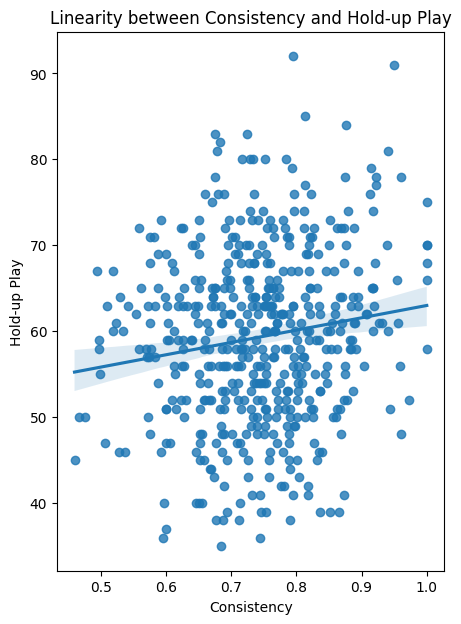

In [65]:
"""Checks for linearity"""
plt.figure(figsize=(5,7))
sns.regplot(x = 'Consistency', y = 'Hold-up Play', data = data)
plt.title('Linearity between Consistency and Hold-up Play')
plt.xlabel('Consistency')
plt.ylabel('Hold-up Play')
plt.show()

In [66]:
from scipy.stats import pearsonr

In [67]:
"""Checks correlation between 2 columns"""
Consistency = data['Consistency']
Hold_up_play = data['Hold-up Play']

corr, p_value = pearsonr(Consistency, Hold_up_play)
print("Correlation coefficient: ",corr)                       
print("P value: ",p_value)

if p_value < 0.05:
   print('Reject the null hypothesis')
else:
    print('Fail to reject the null hypothesis')

Correlation coefficient:  0.14654573283554145
P value:  0.0010146963053630409
Reject the null hypothesis


In [82]:
data.head()

,Striker_ID,Nationality,Footedness,Marital Status,Goals Scored,Assists,Shots on Target,Shot Accuracy,Conversion Rate,Dribbling Success,...,Consistency,Penalty Success Rate,Impact on Team Performance,Off-field Conduct,Total Contribution Score,Brazil,England,France,Germany,Spain
0,1,Spain,0,0,17,10,34,0.677836,0.166241,0.757061,...,0.820314,0.922727,8,11,113.577376,False,False,False,False,True
1,2,France,0,1,14,13,31,0.544881,0.192774,0.796818,...,0.803321,0.678984,3,8,110.600139,False,False,True,False,False
2,3,Germany,0,0,18,3,25,0.518180,0.160379,0.666869,...,0.766540,0.843858,8,9,94.433410,False,False,False,True,False
3,4,France,1,0,22,9,20,0.599663,0.184602,0.638776,...,0.611798,0.662997,6,8,124.250575,False,False,True,False,False
4,5,France,0,1,13,6,29,0.582982,0.105319,0.591485,...,0.701638,0.906538,8,6,107.293123,False,False,True,False,False


In [70]:
"""Create a new feature"""
data['Total Contribution Score'] = data[['Goals Scored','Assists', 
'Shots on Target', 'Dribbling Success', 'Aerial Duels Won',
'Defensive Contribution','Big Game Performance','Consistency']].sum(axis = 1)

In [ ]:
data.head()

In [71]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
data['Marital Status'] = encoder.fit_transform(data['Marital Status'])

In [72]:
"""Encodes Footedness for the model"""
encoder_2 = LabelEncoder()
data['Footedness'] = encoder_2.fit_transform(data['Footedness'])

In [73]:
dummies = pd.get_dummies(data['Nationality'])
data = pd.concat([data, dummies], axis = 1)

In [77]:
x = data.drop(['Striker_ID','Nationality',], axis = 1)

In [ ]:
print(x.columns)

In [78]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [80]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,15):
    kmeans = KMeans(n_clusters = i, init = 'k-means++')
    kmeans.fit(x_scaled)
    wcss_score = kmeans.inertia_
    wcss.append(wcss_score)

<function matplotlib.pyplot.show(close=None, block=None)>

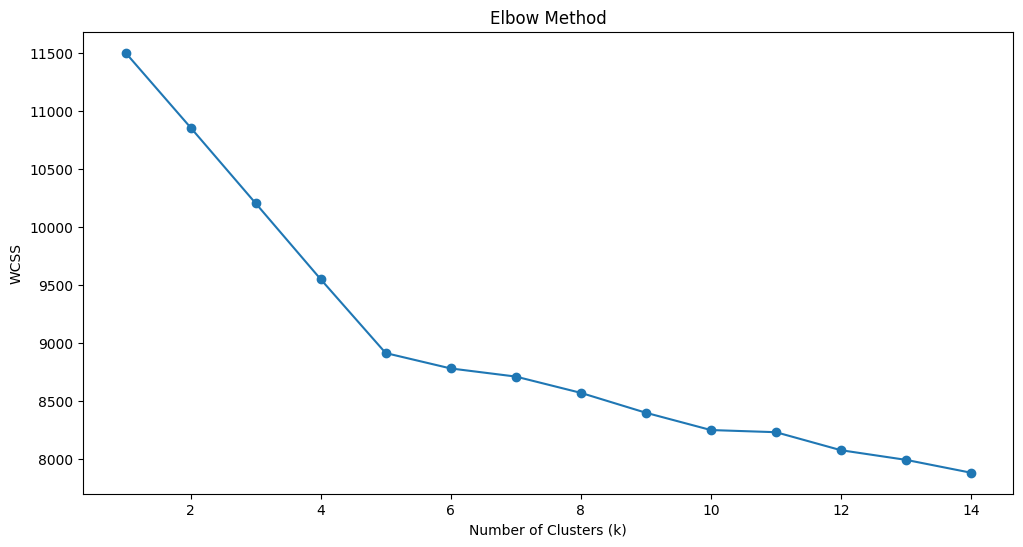

In [81]:
plt.figure(figsize = (12, 6))
plt.plot(range(1,15), wcss, marker = 'o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.show

In [83]:
final_km = KMeans(n_clusters = 2)
final_km.fit(x)
labels = final_km.labels_
labels

array([1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1,

In [87]:
data['Clusters'] = labels
data.head()

,Striker_ID,Nationality,Footedness,Marital Status,Goals Scored,Assists,Shots on Target,Shot Accuracy,Conversion Rate,Dribbling Success,...,Impact on Team Performance,Off-field Conduct,Total Contribution Score,Brazil,England,France,Germany,Spain,Clusters,Strikers types
0,1,Spain,0,0,17,10,34,0.677836,0.166241,0.757061,...,8,11,113.577376,False,False,False,False,True,1,Regular Strikers
1,2,France,0,1,14,13,31,0.544881,0.192774,0.796818,...,3,8,110.600139,False,False,True,False,False,1,Regular Strikers
2,3,Germany,0,0,18,3,25,0.518180,0.160379,0.666869,...,8,9,94.433410,False,False,False,True,False,1,Regular Strikers
3,4,France,1,0,22,9,20,0.599663,0.184602,0.638776,...,6,8,124.250575,False,False,True,False,False,0,Best Strikers
4,5,France,0,1,13,6,29,0.582982,0.105319,0.591485,...,8,6,107.293123,False,False,True,False,False,1,Regular Strikers


In [85]:
round(data.groupby('Clusters')['Total Contribution Score'].mean(),2)

Clusters
0    123.57
1    102.15
Name: Total Contribution Score, dtype: float64

In [86]:
mapping = {0:'Best Strikers', 1:'Regular Strikers'}
data['Strikers types'] = data['Clusters'].map(mapping)

In [88]:
data = data.drop(['Clusters'], axis = 1)

In [89]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix

In [90]:
y = data['Strikers types']

In [91]:
from sklearn.preprocessing import StandardScaler

In [92]:
scaler = StandardScaler()
scaled_x = scaler.fit_transform(x)

In [93]:
scaled_x

array([[-1.07047781, -1.03252879,  0.5050467 , ..., -0.47801802,
        -0.47169258,  1.86125917],
       [-1.07047781,  0.968496  , -0.10638998, ...,  2.09197134,
        -0.47169258, -0.53727069],
       [-1.07047781, -1.03252879,  0.70885893, ..., -0.47801802,
         2.12002488, -0.53727069],
       ...,
       [-1.07047781,  0.968496  , -0.10638998, ..., -0.47801802,
        -0.47169258, -0.53727069],
       [ 0.93416229,  0.968496  , -0.9216389 , ..., -0.47801802,
        -0.47169258, -0.53727069],
       [-1.07047781, -1.03252879, -1.32926335, ..., -0.47801802,
        -0.47169258, -0.53727069]], shape=(500, 23))

In [94]:
from sklearn.model_selection import train_test_split

In [95]:
"""Split the data"""
x_train,x_test,y_train,y_test = train_test_split(scaled_x,y,test_size = 0.2,random_state = 42)

In [96]:
"""Building the logistic regression model"""
lgr_model = LogisticRegression()
lgr_model.fit(x_train,y_train)

y_lgr_pred = lgr_model.predict(x_test)

accuracy_lgr = accuracy_score(y_test,y_lgr_pred)
print(accuracy_lgr *100, '%')

96.0 %


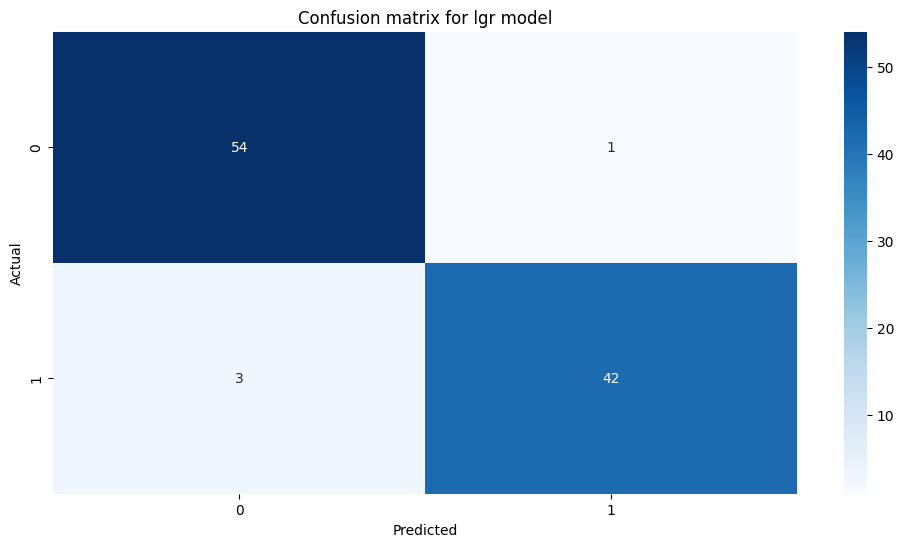

In [97]:
"""Evaluate the model"""
conf_matrix_lgr = confusion_matrix(y_test, y_lgr_pred)

plt.figure(figsize = (12, 6))
sns.heatmap(conf_matrix_lgr, annot = True, fmt = "d", cmap = "Blues")
plt.title('Confusion matrix for lgr model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()